In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

#Load MNIST Dataset
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

#Normalize the Dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

#Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Train the model
history = model.fit(x_train, y_train, epochs=15, validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Loss: {test_loss:.4f}")
print(f"Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8683 - loss: 0.4528 - val_accuracy: 0.9698 - val_loss: 0.1089
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9659 - loss: 0.1131 - val_accuracy: 0.9765 - val_loss: 0.0885
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9765 - loss: 0.0726 - val_accuracy: 0.9743 - val_loss: 0.0860
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9828 - loss: 0.0531 - val_accuracy: 0.9777 - val_loss: 0.0815
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9871 - loss: 0.0419 - val_accuracy: 0.9787 - val_loss: 0.0763
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9906 - loss: 0.0286 - val_accuracy: 0.9782 - val_loss: 0.0859
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9913 - loss: 0.0261 - val_accuracy: 0.9788 - val_loss: 0.0881
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9930 - loss: 0.0207 

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)
# 1 Regularization tehnique (Dropout)
model1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# 2 Regularization techniques (Dropout + L2 Regularization)
model2 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [6]:
train1 = model1.fit(x_train, y_train, epochs=10, validation_split=0.1)
print("\n")
train2 = model2.fit(x_train, y_train, epochs=8, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7803 - loss: 0.6908 - val_accuracy: 0.9645 - val_loss: 0.1235
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9334 - loss: 0.2298 - val_accuracy: 0.9705 - val_loss: 0.1015
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9478 - loss: 0.1725 - val_accuracy: 0.9742 - val_loss: 0.0888
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9547 - loss: 0.1476 - val_accuracy: 0.9778 - val_loss: 0.0835
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9604 - loss: 0.1305 - val_accuracy: 0.9798 - val_loss: 0.0765
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9653 - loss: 0.1155 - val_accuracy: 0.9790 - val_loss: 0.0710
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9671 - loss: 0.1085 - val_accuracy: 0.9792 - val_loss: 0.0737
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9700 - loss: 0.100

In [7]:
print("Model 1 Evaluation (Dropout Only):")
test_loss1, test_acc1 = model1.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss1:.6f}")
print(f"Test Accuracy: {test_acc1:.6f}")

print("\nModel 2 Evaluation (Dropout + L2):")
test_loss2, test_acc2 = model2.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss2:.4f}")
print(f"Test Accuracy: {test_acc2:.4f}")

Model 1 Evaluation (Dropout Only):
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.0928
Test Loss: 0.078741
Test Accuracy: 0.976300

Model 2 Evaluation (Dropout + L2):
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.2182
Test Loss: 0.2017
Test Accuracy: 0.9737


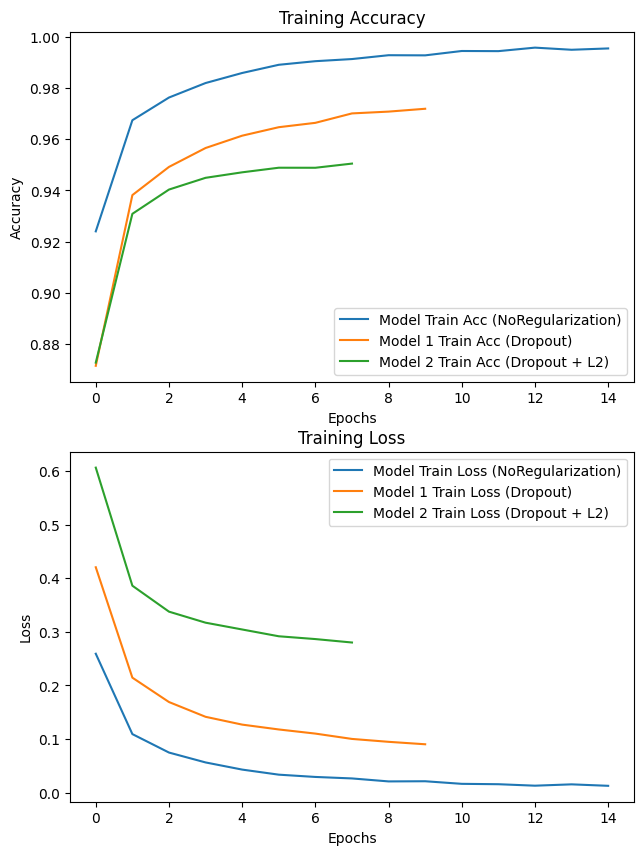

In [8]:
plt.figure(figsize=(16, 10))

# Training Accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Model Train Acc (NoRegularization)')
plt.plot(train1.history['accuracy'], label='Model 1 Train Acc (Dropout)')
plt.plot(train2.history['accuracy'], label='Model 2 Train Acc (Dropout + L2)')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Training Loss
plt.subplot(2, 2, 3)
plt.plot(history.history['loss'], label='Model Train Loss (NoRegularization)')
plt.plot(train1.history['loss'], label='Model 1 Train Loss (Dropout)')
plt.plot(train2.history['loss'], label='Model 2 Train Loss (Dropout + L2)')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

Analysis

Model
No regularization techniques used.

No learning rate scheduling applied.

Performs well in the early stages but tends to overfit over time.

Without regularization or a learning rate schedule, training becomes less stable and generalization suffers.

A decent baseline, but not ideal for real-world performance.

Model 1
Uses Dropout for regularization.

Includes a Learning Rate Scheduler.

Effectively prevents overfitting and learns robustly.

Dropout randomly deactivates neurons during training, helping the model avoid relying on specific features.

The learning rate scheduler helps the model converge steadily and fine-tune over time.

Achieves the best results overall, with the highest accuracy and lowest loss.

Model 2
Combines Dropout and L2 Regularization.

Also uses a Learning Rate Scheduler.

The combination leads to underfitting, limiting the model’s learning capacity.

Ends up with the lowest accuracy and highest loss among all models.

